Iris  Dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Loading the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Mapping the species numbers to actual species names
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_mapping)

# Displaying the first few rows
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [2]:
# Summary statistics
print(iris_df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [3]:
# Checking for missing values
print(iris_df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


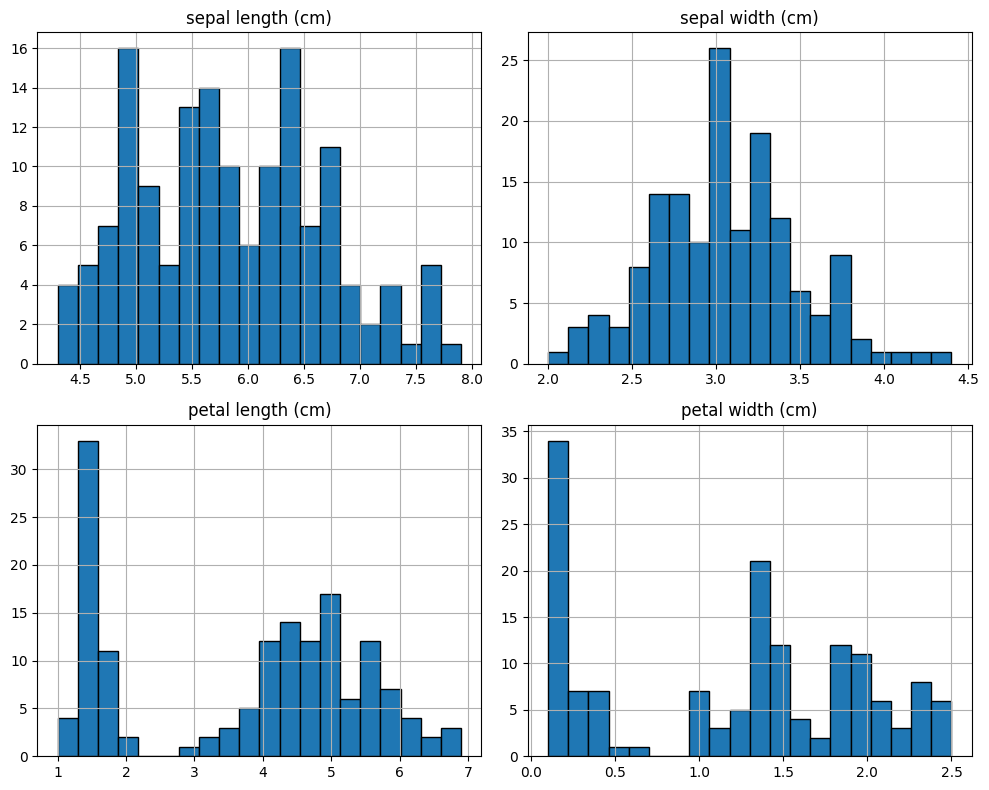

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each feature
iris_df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


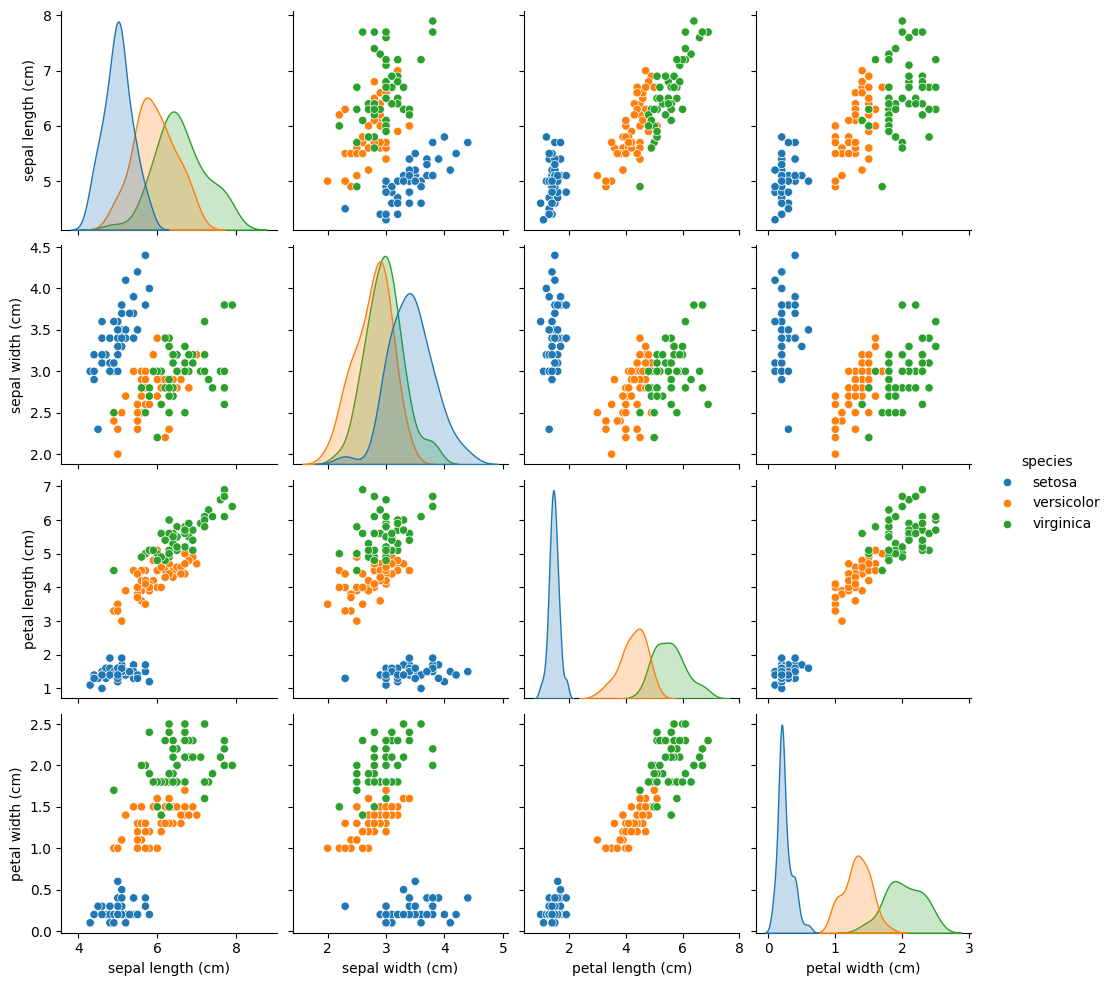

In [5]:
# Pairplot for relationships between features
sns.pairplot(iris_df, hue="species", diag_kind='kde')
plt.show()


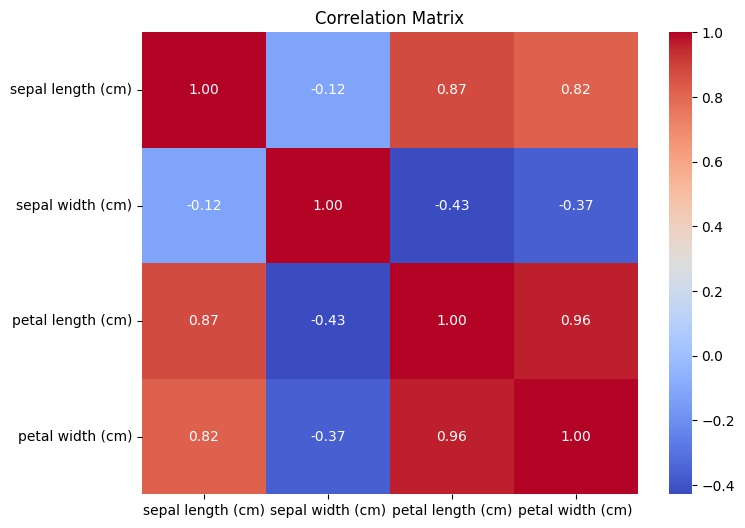

In [6]:
# Correlation matrix
corr_matrix = iris_df.drop('species', axis=1).corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


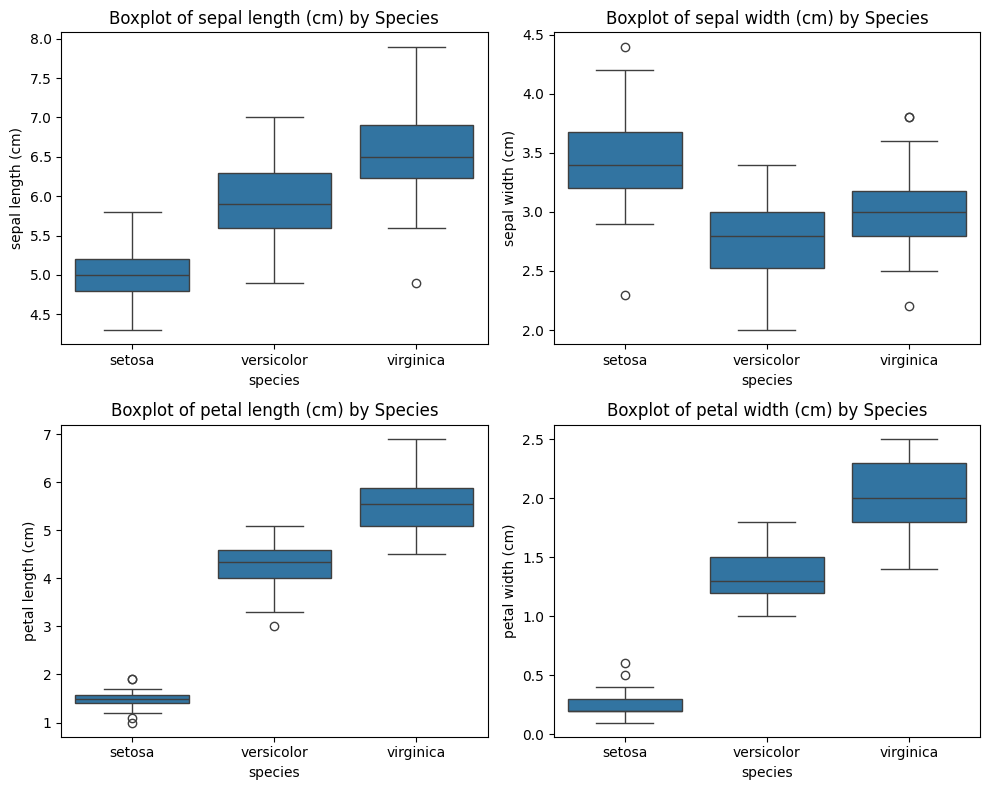

In [8]:
# Boxplots to identify potential outliers
plt.figure(figsize=(10, 8))
for i, feature in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=feature, data=iris_df)
    plt.title(f"Boxplot of {feature} by Species")
plt.tight_layout()
plt.show()


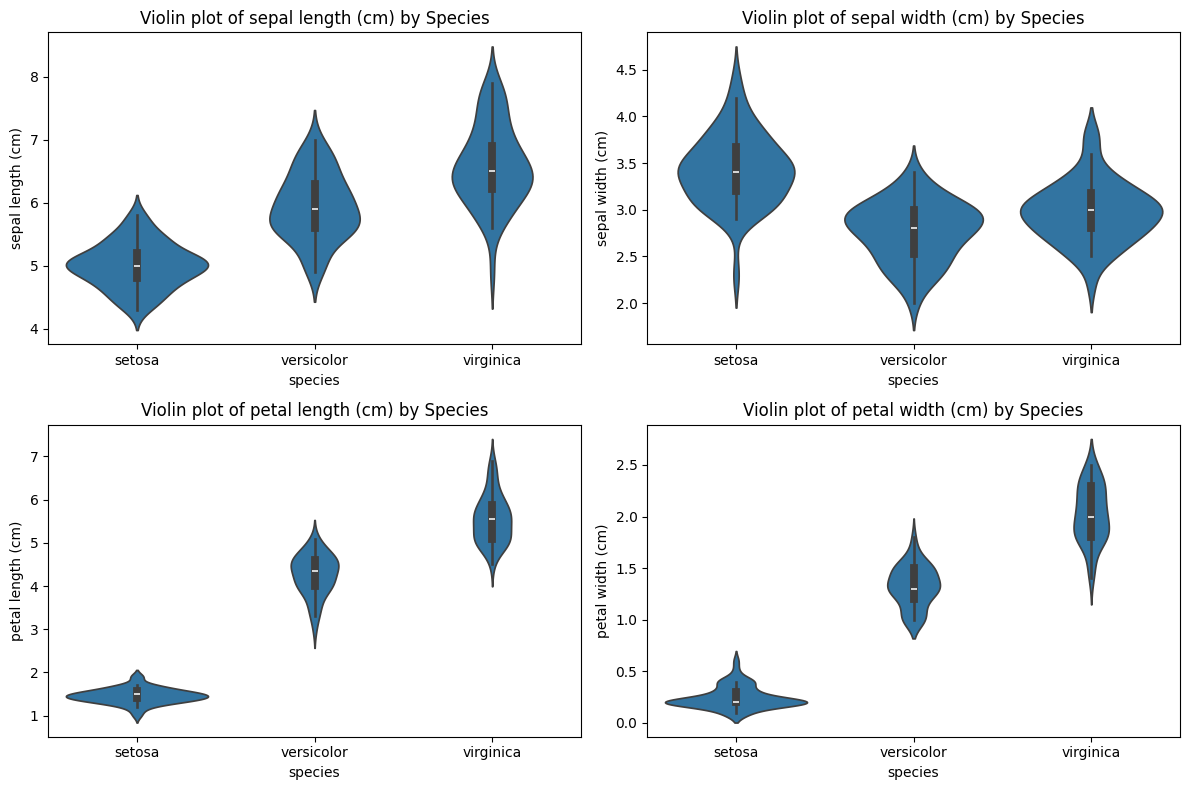

In [9]:
# Violin plots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='species', y=feature, data=iris_df)
    plt.title(f"Violin plot of {feature} by Species")
plt.tight_layout()
plt.show()


In [4]:

iris_numerical = iris_df.drop(columns=['species'])

# Standardizing the numerical columns
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_numerical)

# Converting the scaled data back to a DataFrame
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris_numerical.columns)


print(iris_scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


C:\Users\PMLS\AppData\Local\Temp\ipykernel_8580\1269874942.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')


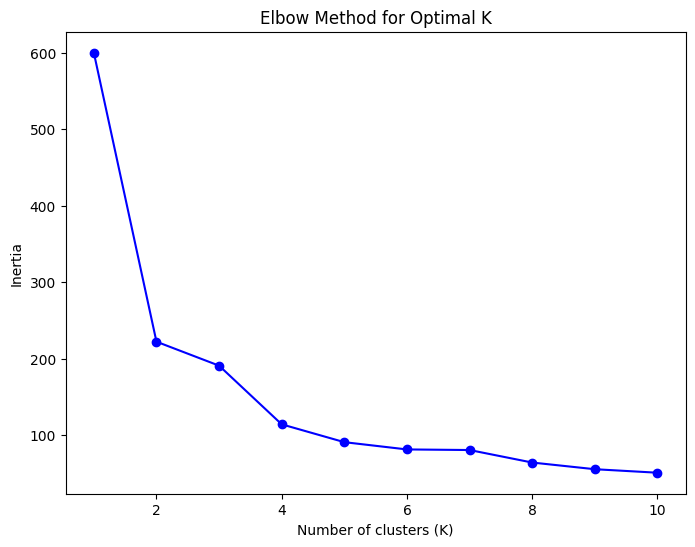

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)

# Plottinng the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_8580\1662536291.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(2, 11), silhouette_scores, 'bo-', marker='o')


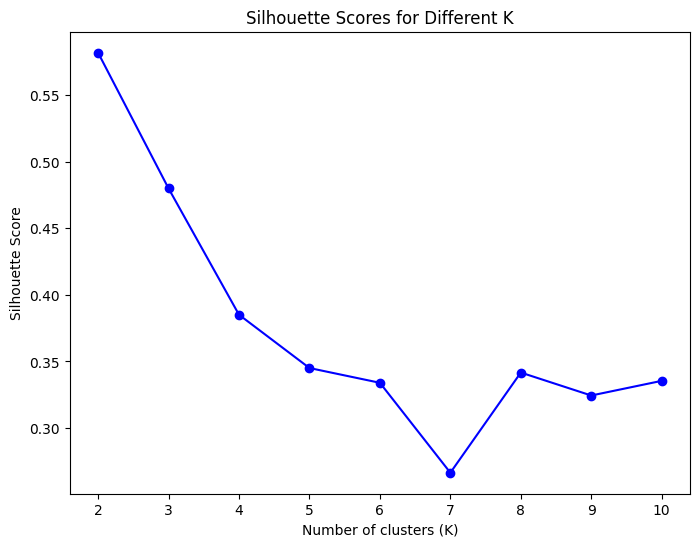

The optimal number of clusters based on Silhouette Score is 2.


In [6]:
from sklearn.metrics import silhouette_score

# Calculating silhouette scores for different K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    score = silhouette_score(iris_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-', marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Optimal number of clusters based on silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 as range starts from 2
print(f"The optimal number of clusters based on Silhouette Score is {optimal_k}.")


In [7]:
# Applyig K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris_df['kmeans_cluster'] = kmeans.fit_predict(iris_scaled)

# Displaying the cluster labels
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  kmeans_cluster  
0  setosa               1  
1  setosa               1  
2  setosa               1  
3  setosa               1  
4  setosa               1  


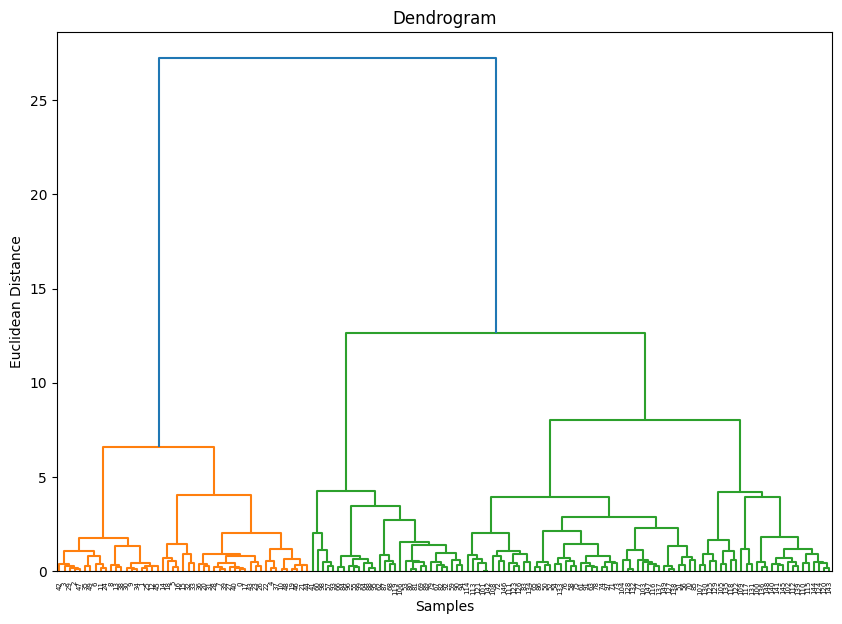

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram using 'ward' linkage (minimizes variance)
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(iris_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


In [10]:
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters based on the dendrogram (e.g., 3)
n_clusters = 3  

# Agglomerative Clustering 
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fitting and predicting cluster labels
iris_df['hierarchical_cluster'] = hc.fit_predict(iris_scaled)

# Displaying the cluster labels
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  kmeans_cluster  hierarchical_cluster  
0  setosa               1                     1  
1  setosa               1                     1  
2  setosa               1                     1  
3  setosa               1                     1  
4  setosa               1                     1  


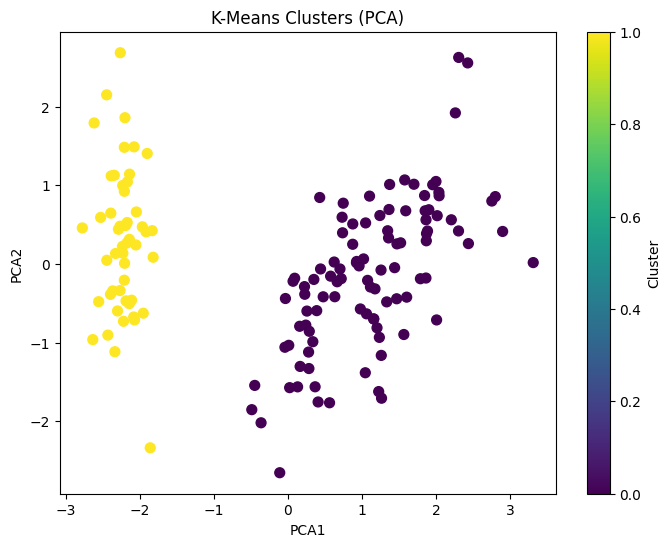

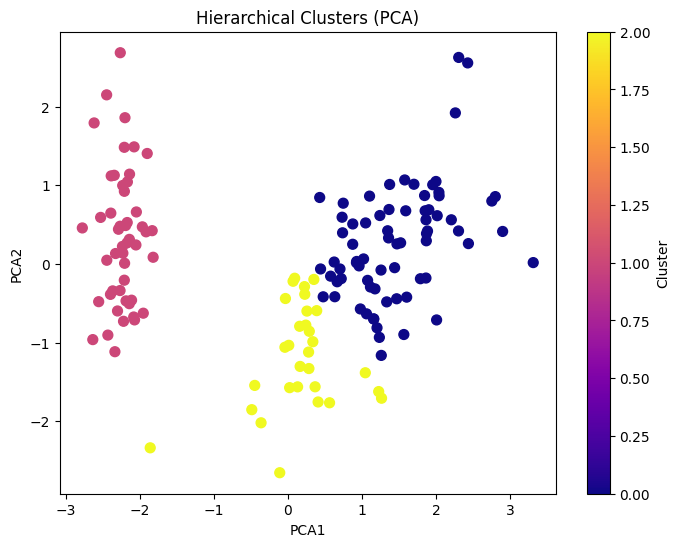

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# Adding the PCA components to the DataFrame
iris_df['PCA1'] = iris_pca[:, 0]
iris_df['PCA2'] = iris_pca[:, 1]

# Plotting the K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['PCA1'], iris_df['PCA2'], c=iris_df['kmeans_cluster'], cmap='viridis', marker='o', s=50)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

# Plotting the Hierarchical clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['PCA1'], iris_df['PCA2'], c=iris_df['hierarchical_cluster'], cmap='plasma', marker='o', s=50)
plt.title('Hierarchical Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()


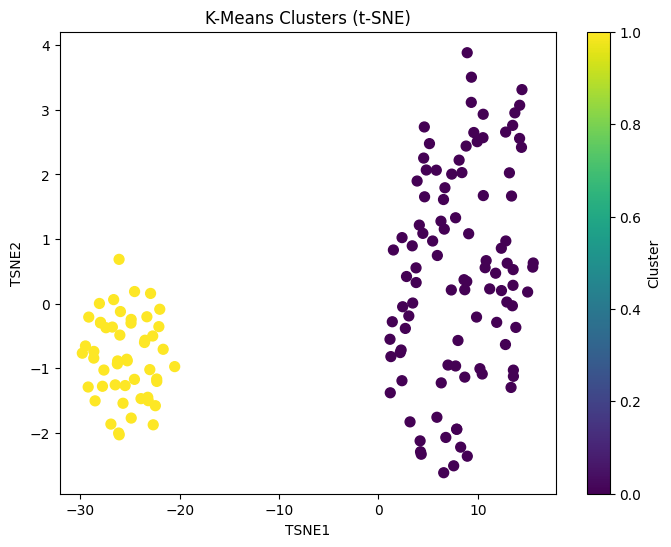

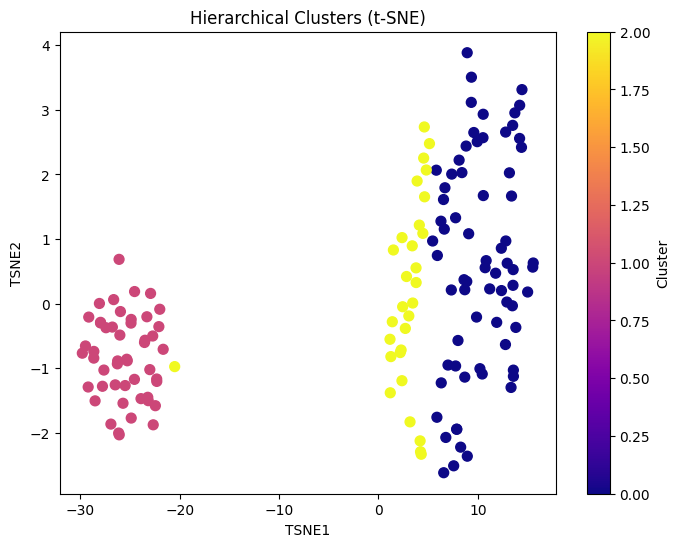

In [12]:
from sklearn.manifold import TSNE

# Applying t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
iris_tsne = tsne.fit_transform(iris_scaled)

# Adding t-SNE components to the DataFrame
iris_df['TSNE1'] = iris_tsne[:, 0]
iris_df['TSNE2'] = iris_tsne[:, 1]

# Plotting the K-Means clusters with t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['TSNE1'], iris_df['TSNE2'], c=iris_df['kmeans_cluster'], cmap='viridis', marker='o', s=50)
plt.title('K-Means Clusters (t-SNE)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster')
plt.show()

# Plotting the Hierarchical clusters with t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['TSNE1'], iris_df['TSNE2'], c=iris_df['hierarchical_cluster'], cmap='plasma', marker='o', s=50)
plt.title('Hierarchical Clusters (t-SNE)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(iris_scaled, iris_df['kmeans_cluster'])
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

# Silhouette Score for Hierarchical Clustering
hc_silhouette = silhouette_score(iris_scaled, iris_df['hierarchical_cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {hc_silhouette}')


Silhouette Score for K-Means: 0.5817500491982808
Silhouette Score for Hierarchical Clustering: 0.4466890410285909


In [14]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index for K-Means
kmeans_dbi = davies_bouldin_score(iris_scaled, iris_df['kmeans_cluster'])
print(f'Davies-Bouldin Index for K-Means: {kmeans_dbi}')

# Davies-Bouldin Index for Hierarchical Clustering
hc_dbi = davies_bouldin_score(iris_scaled, iris_df['hierarchical_cluster'])
print(f'Davies-Bouldin Index for Hierarchical Clustering: {hc_dbi}')


Davies-Bouldin Index for K-Means: 0.5933126905762435
Davies-Bouldin Index for Hierarchical Clustering: 0.8034665302876753


In [15]:
#4
# Adding the species to the dataset for comparison
iris_df['species'] = iris.target

# Grouping the data by K-Means clusters and get the means of each feature
kmeans_analysis = iris_df.groupby('kmeans_cluster').mean()

print("K-Means Cluster Analysis:\n", kmeans_analysis)


K-Means Cluster Analysis:
                 sepal length (cm)  sepal width (cm)  petal length (cm)  \
kmeans_cluster                                                           
0                           6.262             2.872              4.906   
1                           5.006             3.428              1.462   

                petal width (cm)  species  hierarchical_cluster      PCA1  \
kmeans_cluster                                                              
0                          1.676      1.5                  0.58  1.112377   
1                          0.246      0.0                  1.02 -2.224753   

                    PCA2      TSNE1     TSNE2  
kmeans_cluster                                 
0              -0.144464   8.245379  0.499680  
1               0.288927 -25.425552 -0.830729  


In [16]:
# Grouping the data by Hierarchical clusters and get the means of each feature
hc_analysis = iris_df.groupby('hierarchical_cluster').mean()

print("Hierarchical Cluster Analysis:\n", hc_analysis)


Hierarchical Cluster Analysis:
                       sepal length (cm)  sepal width (cm)  petal length (cm)  \
hierarchical_cluster                                                           
0                              6.546479          2.992958           5.267606   
1                              5.016327          3.451020           1.465306   
2                              5.530000          2.566667           3.930000   

                      petal width (cm)   species  kmeans_cluster      PCA1  \
hierarchical_cluster                                                         
0                             1.854930  1.676056        0.000000  1.469320   
1                             0.244898  0.000000        1.000000 -2.232235   
2                             1.206667  1.033333        0.033333  0.168594   

                          PCA2      TSNE1     TSNE2  
hierarchical_cluster                                 
0                     0.263515  10.298318  0.640325  
1             

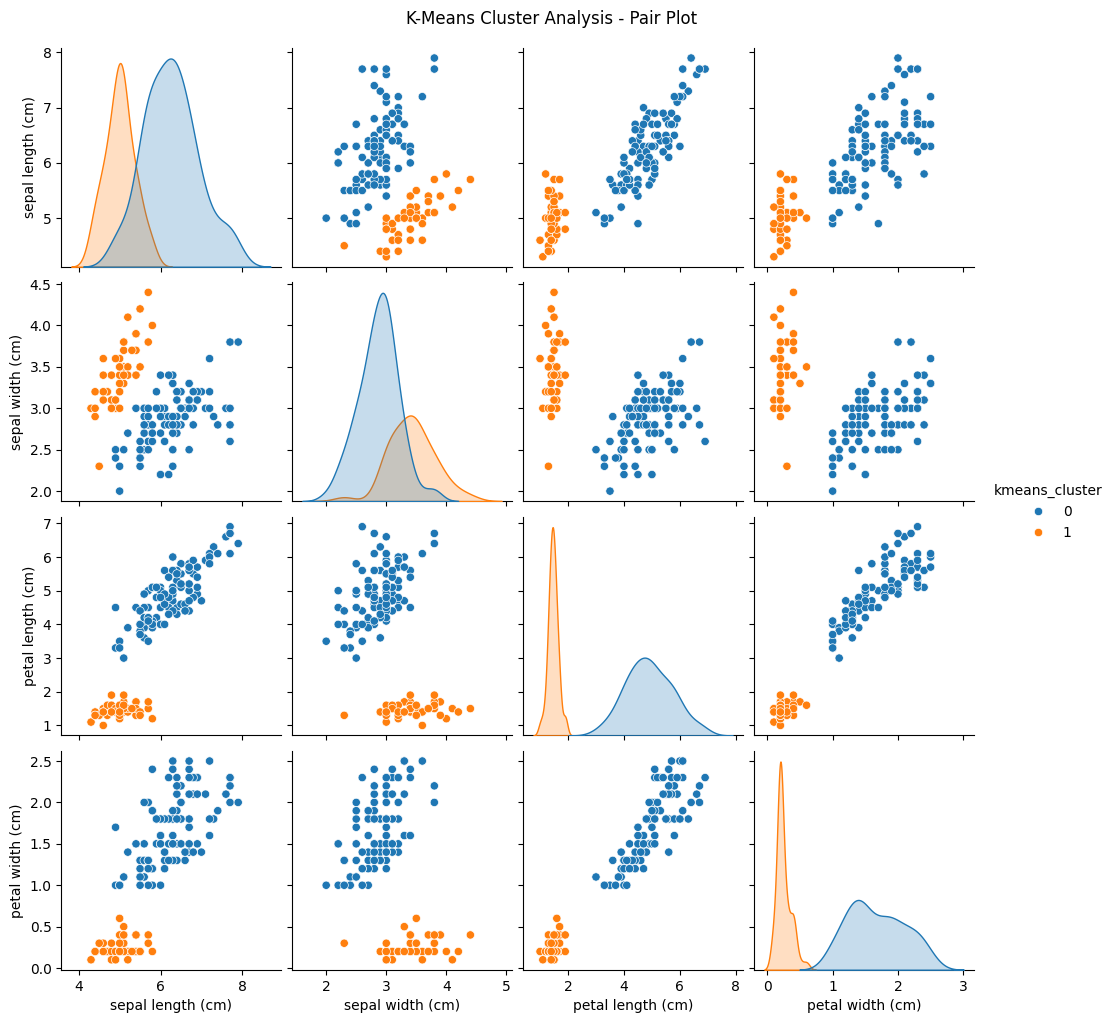

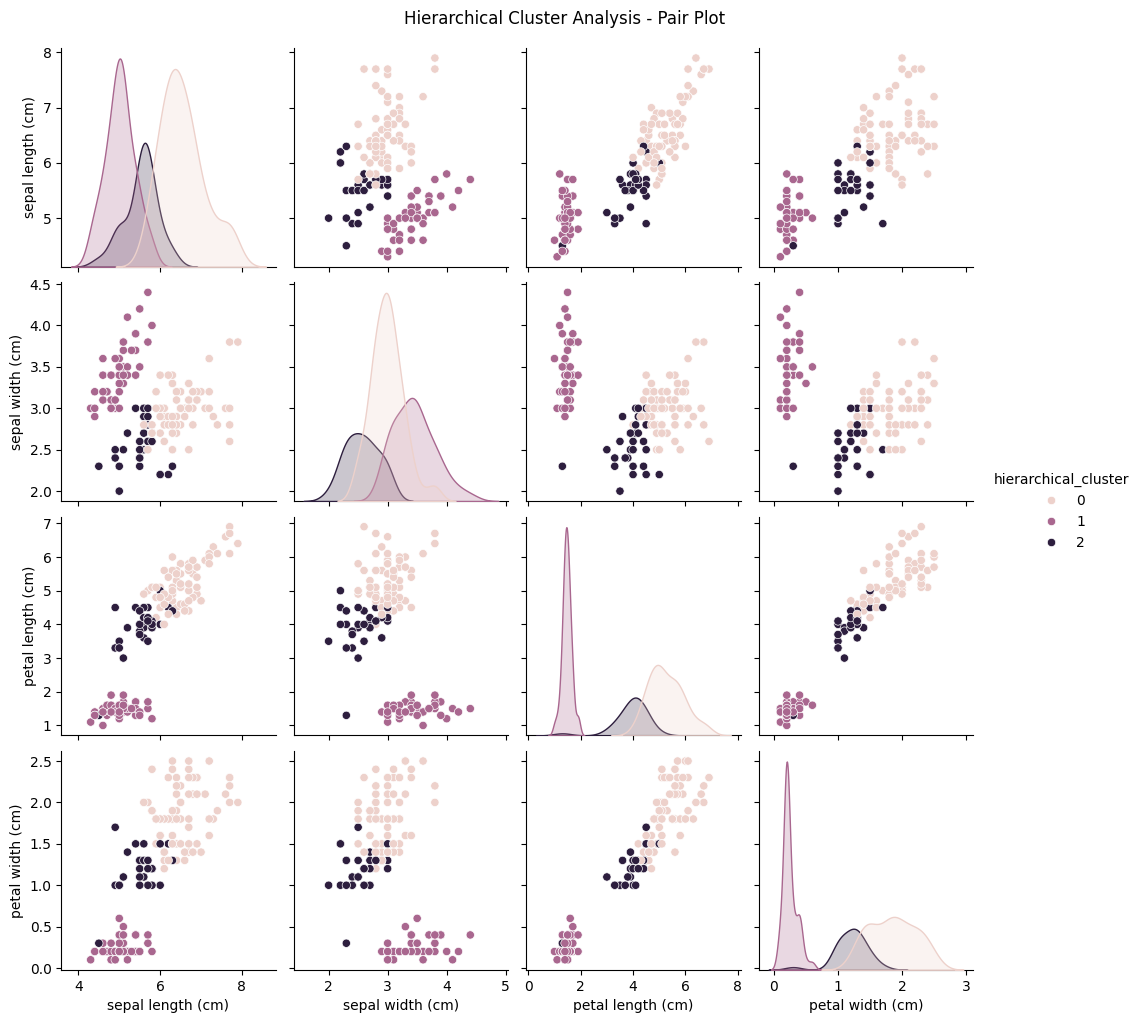

In [17]:
import seaborn as sns

# Pair plot for K-Means clusters
sns.pairplot(iris_df, hue='kmeans_cluster', vars=iris.feature_names)
plt.suptitle("K-Means Cluster Analysis - Pair Plot", y=1.02)
plt.show()

# Pair plot for Hierarchical clusters
sns.pairplot(iris_df, hue='hierarchical_cluster', vars=iris.feature_names)
plt.suptitle("Hierarchical Cluster Analysis - Pair Plot", y=1.02)
plt.show()


In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Testing different numbers of clusters
for n_clusters in range(2, 6):  # Trying 2 to 5 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(iris_scaled)
    silhouette_avg = silhouette_score(iris_scaled, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


Silhouette Score for 2 clusters: 0.5817500491982808
Silhouette Score for 3 clusters: 0.4798814508199817
Silhouette Score for 4 clusters: 0.3850454053045392
Silhouette Score for 5 clusters: 0.34503345350274617


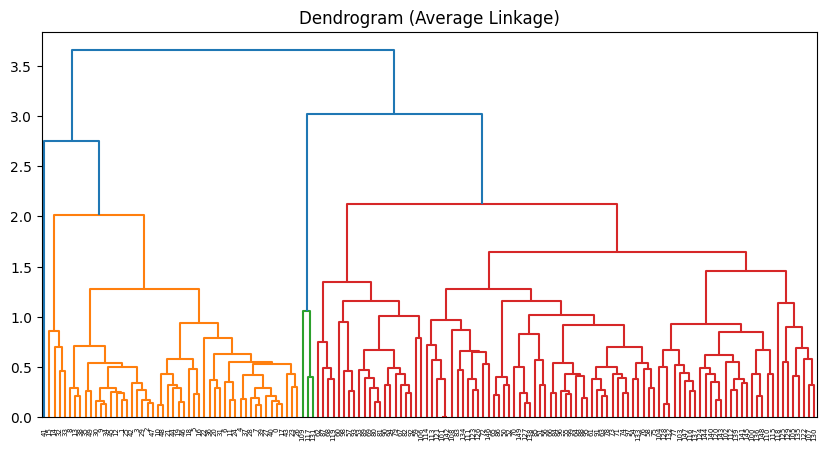

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering dendrogram for 'average' linkage
Z = linkage(iris_scaled, method='average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram (Average Linkage)')
plt.show()


In [20]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means
kmeans_silhouette = silhouette_score(iris_scaled, iris_df['kmeans_cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

# Silhouette score for Hierarchical Clustering
hierarchical_silhouette = silhouette_score(iris_scaled, iris_df['hierarchical_cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")


Silhouette Score for K-Means: 0.5817500491982808
Silhouette Score for Hierarchical Clustering: 0.4466890410285909


In [21]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index for K-Means
kmeans_db = davies_bouldin_score(iris_scaled, iris_df['kmeans_cluster'])
print(f"Davies-Bouldin Index for K-Means: {kmeans_db}")

# Davies-Bouldin Index for Hierarchical Clustering
hierarchical_db = davies_bouldin_score(iris_scaled, iris_df['hierarchical_cluster'])
print(f"Davies-Bouldin Index for Hierarchical Clustering: {hierarchical_db}")


Davies-Bouldin Index for K-Means: 0.5933126905762435
Davies-Bouldin Index for Hierarchical Clustering: 0.8034665302876753


Mall Customers Data

In [2]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

print(df.info())

print(df.head())

# Checking for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                 

In [2]:
# Summary statistics for numerical columns
print(df.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


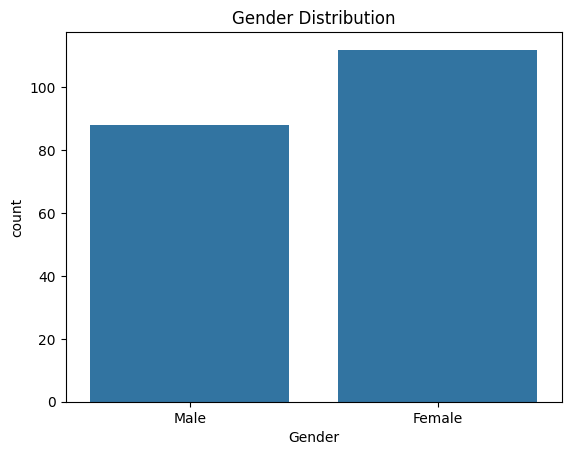

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


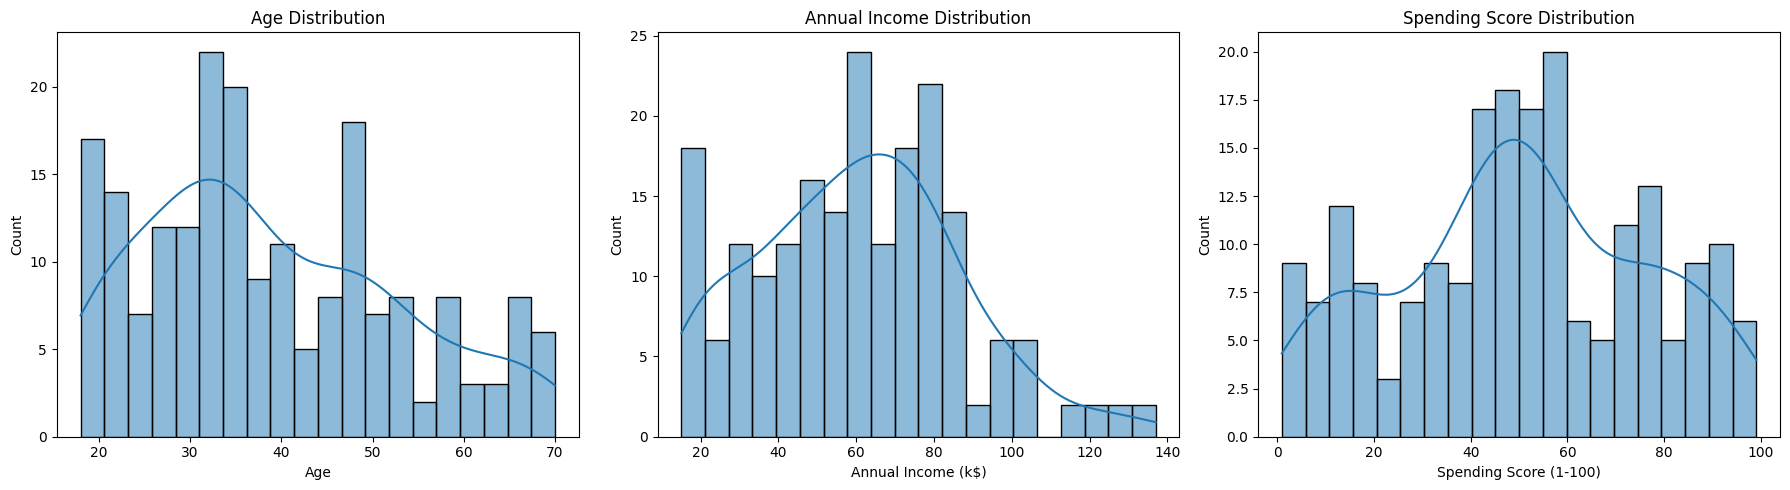

In [4]:
# Histograms for numeric columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()


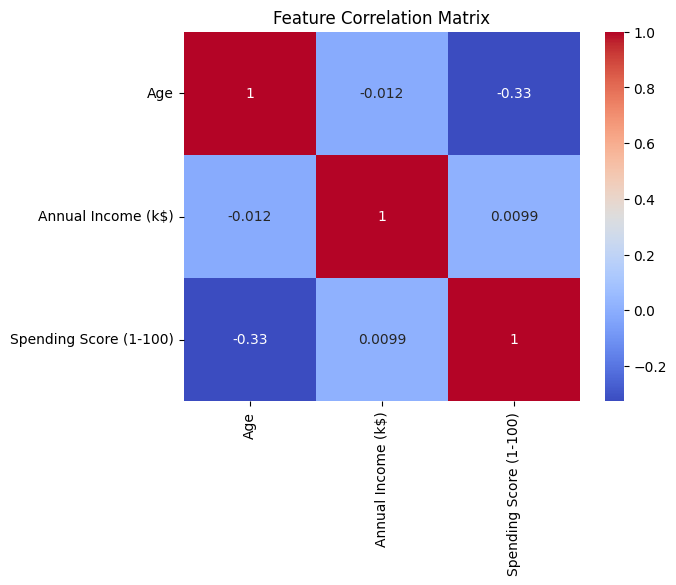

In [5]:
# Correlation matrix
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


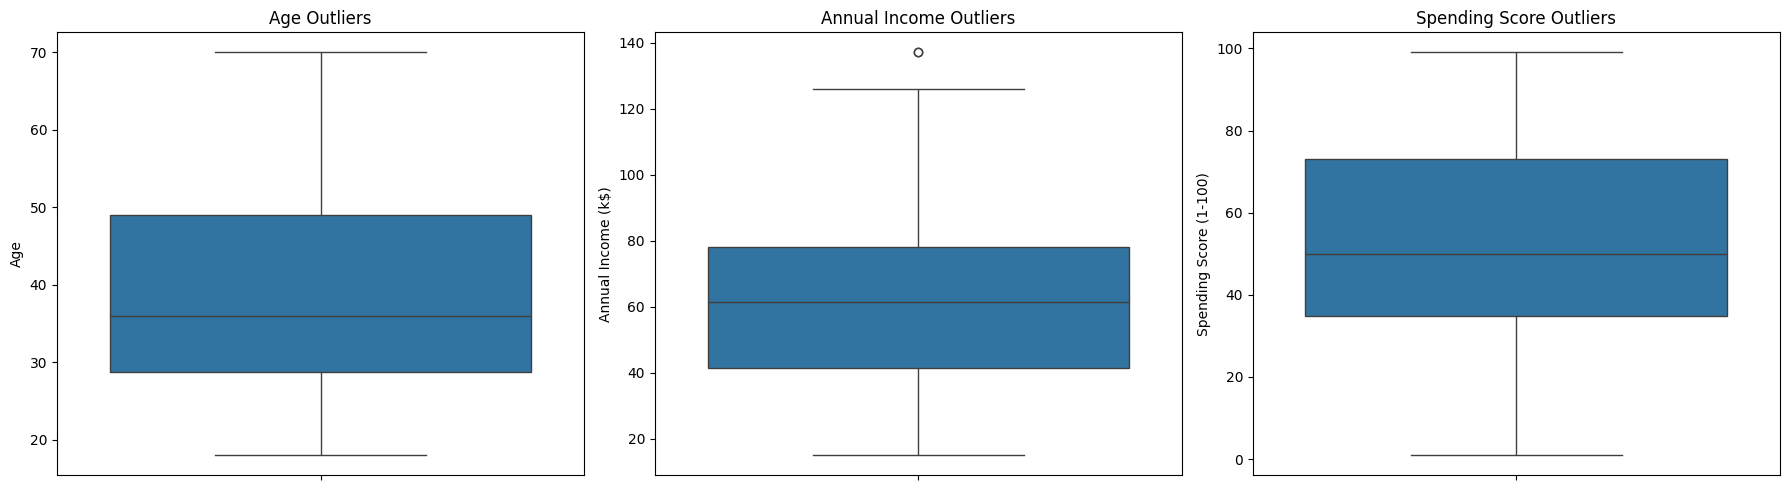

In [6]:
# Boxplots for numerical features to check for outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y='Age', data=df, ax=axes[0])
axes[0].set_title('Age Outliers')

sns.boxplot(y='Annual Income (k$)', data=df, ax=axes[1])
axes[1].set_title('Annual Income Outliers')

sns.boxplot(y='Spending Score (1-100)', data=df, ax=axes[2])
axes[2].set_title('Spending Score Outliers')

plt.tight_layout()
plt.show()


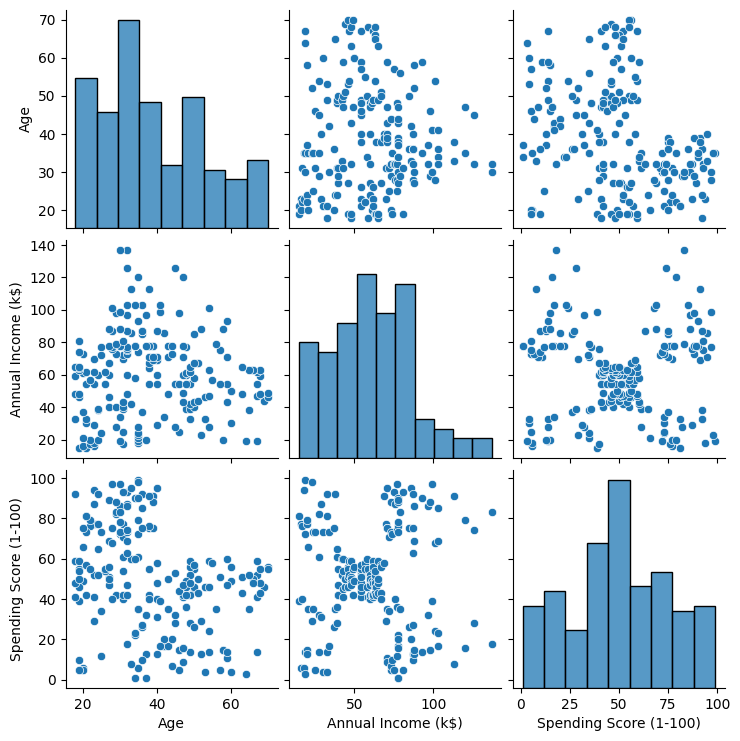

In [7]:
# Scatter plots to visualize relationships
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


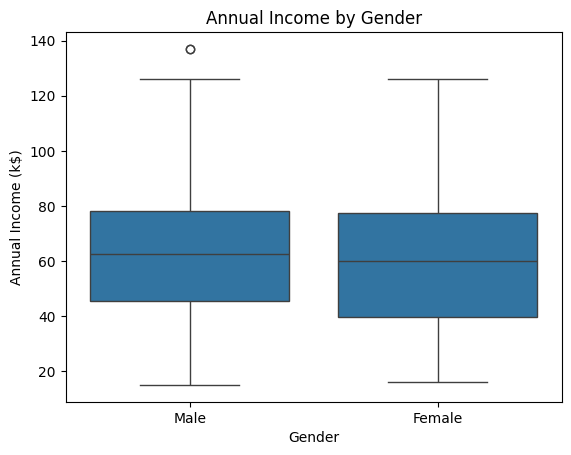

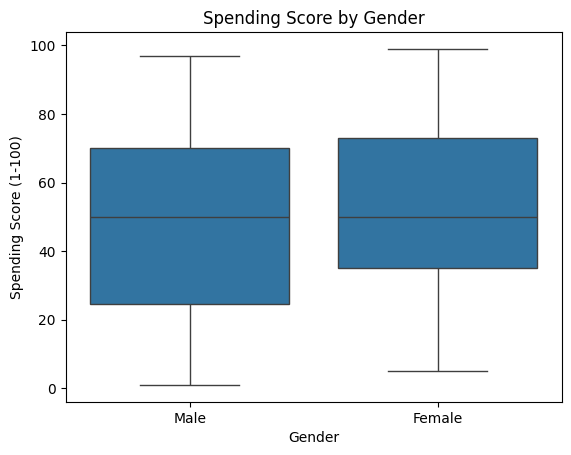

In [8]:
# Boxplot of Annual Income by Gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income by Gender')
plt.show()

# Boxplot of Spending Score by Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.show()


In [5]:
#2
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

# Selecting only numerical columns for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


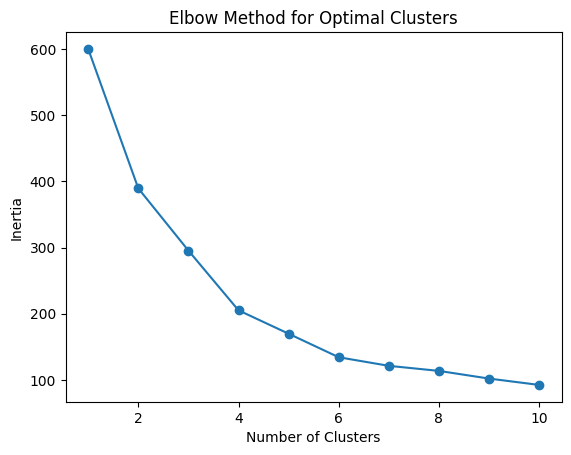

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to determine optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


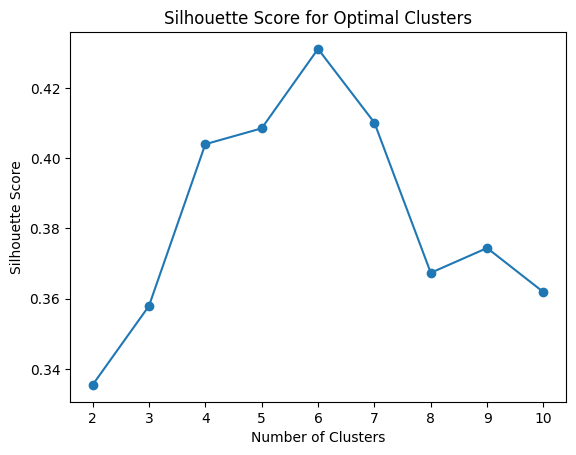

In [7]:
from sklearn.metrics import silhouette_score

# Silhouette score for different number of clusters
silhouette_scores = []

for k in cluster_range[1:]:  # Starting from 2 because Silhouette score is not valid for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette scores
plt.plot(cluster_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


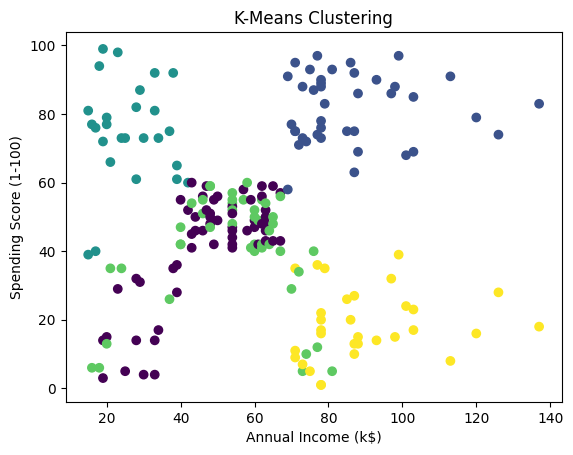

In [8]:
# Assuming the optimal number of clusters is 5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters (in 2D using two features like Income and Spending Score)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


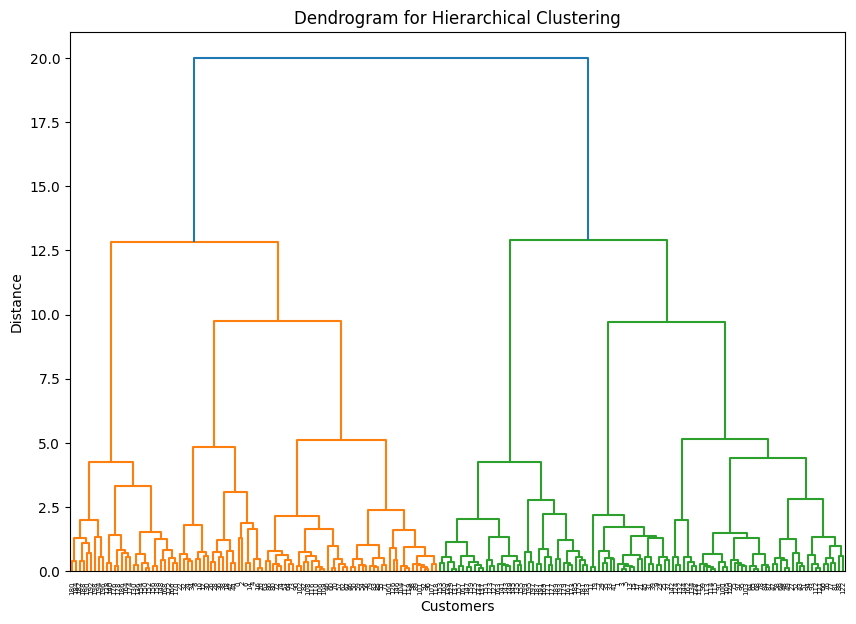

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using linkage to perform hierarchical clustering
Z = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


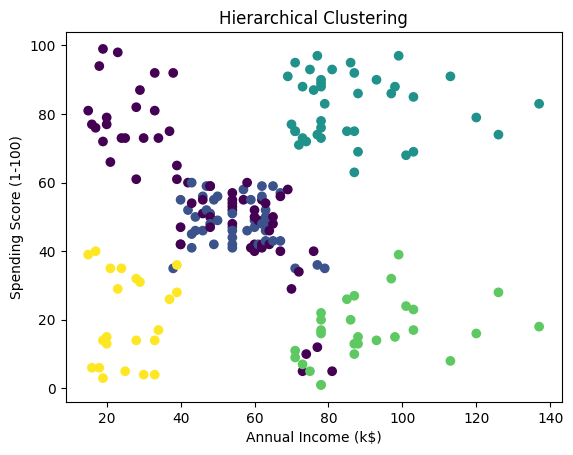

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Fitting hierarchical clustering with the chosen number of clusters
n_clusters = 5  # 
hierarchical_clusters = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

df['Hierarchical_Cluster'] = hierarchical_clusters.fit_predict(X_scaled)

# Visualizing clusters in 2D (e.g., based on Income and Spending Score)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


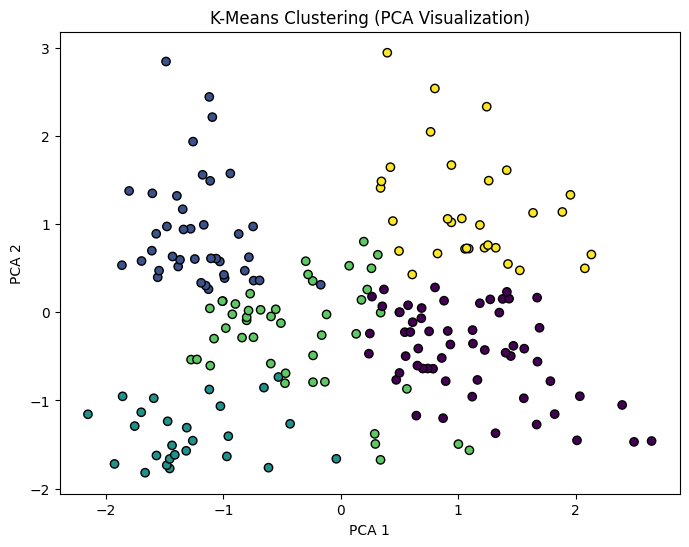

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Applying K-Means with optimal number of clusters (let's assume 5 clusters from Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Applying PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters from K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


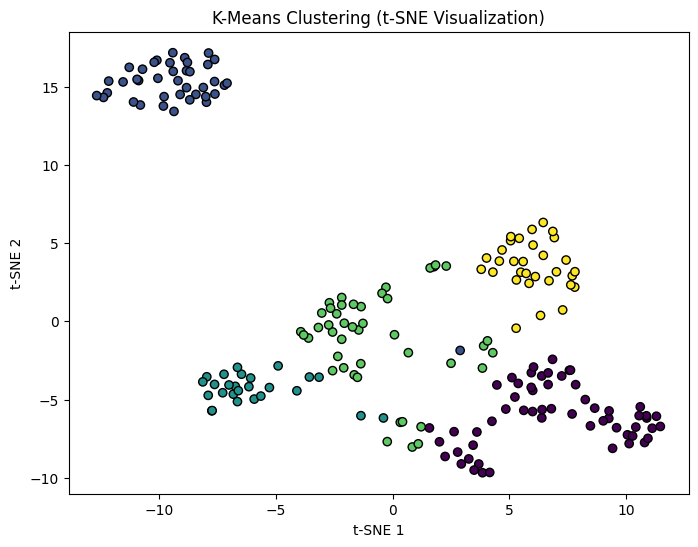

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applyig K-Means with the optimal number of clusters (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Applying t-SNE to reduce the data to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting the clusters from K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering (t-SNE Visualization)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


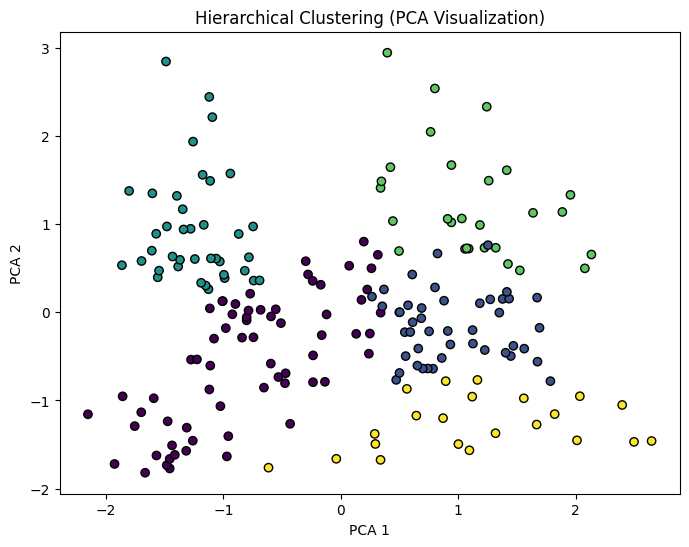

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters from Hierarchical Clustering using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Hierarchical Clustering (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


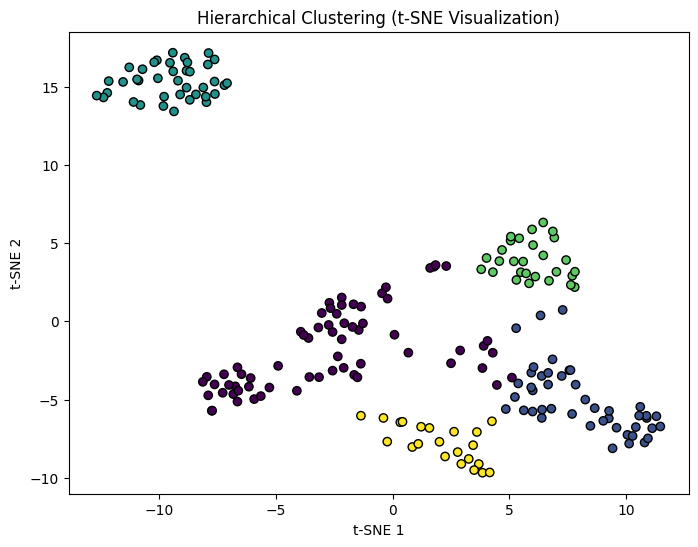

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#  Applying t-SNE to reduce the data to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting the clusters from Hierarchical Clustering using t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Hierarchical Clustering (t-SNE Visualization)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means Silhouette Score and Davies-Bouldin Index
kmeans_silhouette = silhouette_score(X_scaled, kmeans_clusters)
kmeans_db_index = davies_bouldin_score(X_scaled, kmeans_clusters)

# Hierarchical Clustering Silhouette Score and Davies-Bouldin Index
hierarchical_silhouette = silhouette_score(X_scaled, df['Hierarchical_Cluster'])
hierarchical_db_index = davies_bouldin_score(X_scaled, df['Hierarchical_Cluster'])

print("K-Means Clustering Metrics:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_db_index}")

print("\nHierarchical Clustering Metrics:")
print(f"Silhouette Score: {hierarchical_silhouette}")
print(f"Davies-Bouldin Index: {hierarchical_db_index}")


K-Means Clustering Metrics:
Silhouette Score: 0.40846873777345605
Davies-Bouldin Index: 0.8889693268899006

Hierarchical Clustering Metrics:
Silhouette Score: 0.39002826186267214
Davies-Bouldin Index: 0.9162886109753661
